In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure
from matplotlib.pyplot import suptitle
import matplotlib.style as style
from IPython.display import display, HTML
import warnings
%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
warnings.filterwarnings('ignore') 

# Set some parameters to get good visuals - style to ggplot and size to 15,10

pd.set_option('display.width',170, 'display.max_rows',200, 'display.max_columns',900)

In [2]:
df = pd.read_csv("/Users/pvaish10/Desktop/TADPOLE_D1_D2.csv")

In [3]:
df1 = df[['RID', 'PTID', 'VISCODE','D1', 'D2','DX','EXAMDATE','Years_bl','Month','AGE', 'PTGENDER', 'PTEDUCAT', 'PTETHCAT', 'PTRACCAT', 'PTMARRY', 'APOE4', 'FDG','AV45',
         'CDRSB','ADAS11','MMSE', 'RAVLT_immediate','Hippocampus', 'WholeBrain','Entorhinal', 'MidTemp','ABETA_UPENNBIOMK9_04_19_17',
         'TAU_UPENNBIOMK9_04_19_17','PTAU_UPENNBIOMK9_04_19_17']]

In [4]:
df1.head(10)

,RID,PTID,VISCODE,D1,D2,DX,EXAMDATE,Years_bl,Month,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,PTMARRY,APOE4,FDG,AV45,CDRSB,ADAS11,MMSE,RAVLT_immediate,Hippocampus,WholeBrain,Entorhinal,MidTemp,ABETA_UPENNBIOMK9_04_19_17,TAU_UPENNBIOMK9_04_19_17,PTAU_UPENNBIOMK9_04_19_17
0,2,011_S_0002,bl,1,1,NL,2005-09-08,0.000000,0,74.3,Male,16,Not Hisp/Latino,White,Married,0.0,1.36926,NaN,0.0,10.67,28.0,44.0,8336.0,1229740.0,4177.0,27936.0,,,
1,3,011_S_0003,bl,1,0,Dementia,2005-09-12,0.000000,0,81.3,Male,18,Not Hisp/Latino,White,Married,1.0,1.09079,NaN,4.5,22.00,20.0,22.0,5319.0,1129830.0,1791.0,18422.0,741.5,239.7,22.83
2,3,011_S_0003,m06,1,0,Dementia,2006-03-13,0.498289,6,81.3,Male,18,Not Hisp/Latino,White,Married,1.0,1.06360,NaN,6.0,19.00,24.0,19.0,5446.0,1100060.0,2427.0,16972.0,,,
3,3,011_S_0003,m12,1,0,Dementia,2006-09-12,0.999316,12,81.3,Male,18,Not Hisp/Latino,White,Married,1.0,1.10384,NaN,3.5,24.00,17.0,31.0,5157.0,1095640.0,1596.0,17330.0,601.4,251.7,24.18
4,3,011_S_0003,m24,1,0,Dementia,2007-09-12,1.998630,24,81.3,Male,18,Not Hisp/Latino,White,Married,1.0,1.03871,NaN,8.0,25.67,19.0,23.0,5139.0,1088560.0,1175.0,16398.0,,,
5,4,022_S_0004,bl,1,0,MCI,2005-11-08,0.000000,0,67.5,Male,10,Hisp/Latino,White,Married,0.0,NaN,NaN,1.0,14.33,27.0,37.0,6869.0,1154980.0,3983.0,19615.0,1501,153.1,13.29
6,4,022_S_0004,m06,1,0,MCI,2006-05-02,0.479124,6,67.5,Male,10,Hisp/Latino,White,Married,0.0,NaN,NaN,0.5,17.33,28.0,33.0,6439.0,1116280.0,3711.0,20139.0,,,
7,4,022_S_0004,m12,1,0,MCI,2006-11-14,1.015740,12,67.5,Male,10,Hisp/Latino,White,Married,0.0,NaN,NaN,1.0,15.00,26.0,37.0,6451.0,1117390.0,3519.0,19758.0,1176,159.7,13.3
8,4,022_S_0004,m18,1,0,MCI,2007-05-14,1.511290,18,67.5,Male,10,Hisp/Latino,White,Married,0.0,NaN,NaN,1.0,20.33,27.0,44.0,6373.0,1095210.0,3764.0,18754.0,,,
9,4,022_S_0004,m36,1,0,MCI,2008-11-18,3.028060,36,67.5,Male,10,Hisp/Latino,White,Married,0.0,NaN,NaN,1.0,18.00,25.0,44.0,6213.0,1085350.0,3052.0,18934.0,,,


In [5]:
import re
missing_values = []
nonumeric_values = []

print ("Data INFORMATION")
print ("========================\n")

for column in df1:
    # Find all the unique feature values
    uniq = df1[column].unique()
    print ("'{}' has {} unique values" .format(column,uniq.size))
    if (uniq.size > 10):
        print("~~Listing up to 10 unique values~~")
    print (uniq[0:10])
    print ("\n-----------------------------------------------------------------------\n")
    
    # Find features with missing values
    if (True in pd.isnull(uniq)):
        s = "{} has {} missing" .format(column, pd.isnull(df1[column]).sum())
        missing_values.append(s)
    
    # Find features with non-numeric values
    for i in range (1, np.prod(uniq.shape)):
        if (re.match('nan', str(uniq[i]))):
            break
        if not (re.search('(^\d+\.?\d*$)|(^\d*\.?\d+$)', str(uniq[i]))):
            nonumeric_values.append(column)
            break
  
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
print ("Features with missing values:\n{}\n\n" .format(missing_values))
print ("Features with non-numeric values:\n{}" .format(nonumeric_values))
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")

Data INFORMATION

'RID' has 1737 unique values
~~Listing up to 10 unique values~~
[ 2  3  4  5  6  7  8 10 14 15]

-----------------------------------------------------------------------

'PTID' has 1737 unique values
~~Listing up to 10 unique values~~
['011_S_0002' '011_S_0003' '022_S_0004' '011_S_0005' '100_S_0006'
 '022_S_0007' '011_S_0008' '011_S_0010' '022_S_0014' '100_S_0015']

-----------------------------------------------------------------------

'VISCODE' has 22 unique values
~~Listing up to 10 unique values~~
['bl' 'm06' 'm12' 'm24' 'm18' 'm36' 'm72' 'm84' 'm48' 'm60']

-----------------------------------------------------------------------

'D1' has 2 unique values
[1 0]

-----------------------------------------------------------------------

'D2' has 2 unique values
[1 0]

-----------------------------------------------------------------------

'DX' has 9 unique values
['NL' 'Dementia' 'MCI' 'NL to MCI' 'MCI to Dementia' 'MCI to NL'
 'Dementia to MCI' nan 'NL to Dementia'

#### Select rows which have a DX value

In [6]:
df2 = df1.loc[df1['DX'].notnull()]

In [7]:
df2['DX'].value_counts()

MCI                3932
NL                 2668
Dementia           1732
MCI to Dementia     372
NL to MCI           108
MCI to NL            77
Dementia to MCI      12
NL to Dementia        3
Name: DX, dtype: int64

In [8]:
df2[df2['DX'] == 'MCI to Dementia'].head()

,RID,PTID,VISCODE,D1,D2,DX,EXAMDATE,Years_bl,Month,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,PTMARRY,APOE4,FDG,AV45,CDRSB,ADAS11,MMSE,RAVLT_immediate,Hippocampus,WholeBrain,Entorhinal,MidTemp,ABETA_UPENNBIOMK9_04_19_17,TAU_UPENNBIOMK9_04_19_17,PTAU_UPENNBIOMK9_04_19_17
86,42,023_S_0042,m12,1,0,MCI to Dementia,2006-11-09,0.996578,12,72.8,Male,18,Not Hisp/Latino,White,Married,0.0,NaN,NaN,2.0,11.00,24.0,30.0,3858.0,920277.0,2773.0,15444.0,766.5,205.4,18.4
118,54,099_S_0054,m12,1,0,MCI to Dementia,2006-12-27,1.029430,12,81.0,Female,20,Not Hisp/Latino,White,Married,0.0,0.994090,NaN,4.5,28.00,23.0,21.0,4398.0,825830.0,1894.0,13545.0,,,
130,57,018_S_0057,m18,1,0,MCI to Dementia,2007-08-21,1.620810,18,77.3,Male,20,Not Hisp/Latino,White,Married,1.0,0.997036,NaN,4.0,33.00,23.0,8.0,5907.0,975624.0,3032.0,18026.0,,,
196,77,067_S_0077,m12,1,0,MCI to Dementia,2007-02-23,1.040380,12,79.7,Male,18,Not Hisp/Latino,Asian,Married,0.0,NaN,NaN,2.5,24.67,25.0,17.0,4472.0,807931.0,2107.0,12546.0,668.6,686.5,64.91
266,98,067_S_0098,m36,1,0,MCI to Dementia,2009-04-02,3.011640,36,84.4,Female,16,Not Hisp/Latino,White,Divorced,1.0,NaN,NaN,8.0,22.00,23.0,NaN,4356.0,774112.0,2349.0,13717.0,,,


#### Make only three categories

In [9]:
df2 = df2.replace({'NL to MCI': 'MCI', 'MCI to Dementia': 'Dementia', 'MCI to NL' : 'NL', 'NL to Dementia': 'Dementia', 'Dementia to MCI': 'MCI'})

In [10]:
df2['DX'].value_counts()

MCI         4052
NL          2745
Dementia    2107
Name: DX, dtype: int64

In [11]:
import re
missing_values = []
nonumeric_values = []

print ("Data INFORMATION")
print ("========================\n")

for column in df2:
    # Find all the unique feature values
    uniq = df2[column].unique()
    print ("'{}' has {} unique values" .format(column,uniq.size))
    if (uniq.size > 10):
        print("~~Listing up to 10 unique values~~")
    print (uniq[0:10])
    print ("\n-----------------------------------------------------------------------\n")
    
    # Find features with missing values
    if (True in pd.isnull(uniq)):
        s = "{} has {} missing" .format(column, pd.isnull(df2[column]).sum())
        missing_values.append(s)
    
    # Find features with non-numeric values
    for i in range (1, np.prod(uniq.shape)):
        if (re.match('nan', str(uniq[i]))):
            break
        if not (re.search('(^\d+\.?\d*$)|(^\d*\.?\d+$)', str(uniq[i]))):
            nonumeric_values.append(column)
            break
  
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
print ("Features with missing values:\n{}\n\n" .format(missing_values))
print ("Features with non-numeric values:\n{}" .format(nonumeric_values))
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")

Data INFORMATION

'RID' has 1730 unique values
~~Listing up to 10 unique values~~
[ 2  3  4  5  6  7  8 10 14 15]

-----------------------------------------------------------------------

'PTID' has 1730 unique values
~~Listing up to 10 unique values~~
['011_S_0002' '011_S_0003' '022_S_0004' '011_S_0005' '100_S_0006'
 '022_S_0007' '011_S_0008' '011_S_0010' '022_S_0014' '100_S_0015']

-----------------------------------------------------------------------

'VISCODE' has 13 unique values
~~Listing up to 10 unique values~~
['bl' 'm06' 'm12' 'm24' 'm18' 'm36' 'm72' 'm84' 'm48' 'm60']

-----------------------------------------------------------------------

'D1' has 2 unique values
[1 0]

-----------------------------------------------------------------------

'D2' has 2 unique values
[1 0]

-----------------------------------------------------------------------

'DX' has 3 unique values
['NL' 'Dementia' 'MCI']

-----------------------------------------------------------------------

'EXAMD

#### Update the age as per the exam and diagnosis

In [12]:
df2['AGE_UPDATED'] = np.round(df2['AGE'] + df2['Years_bl'], 2)

In [13]:
df2.columns

Index(['RID', 'PTID', 'VISCODE', 'D1', 'D2', 'DX', 'EXAMDATE', 'Years_bl', 'Month', 'AGE', 'PTGENDER', 'PTEDUCAT', 'PTETHCAT', 'PTRACCAT', 'PTMARRY', 'APOE4', 'FDG',
       'AV45', 'CDRSB', 'ADAS11', 'MMSE', 'RAVLT_immediate', 'Hippocampus', 'WholeBrain', 'Entorhinal', 'MidTemp', 'ABETA_UPENNBIOMK9_04_19_17',
       'TAU_UPENNBIOMK9_04_19_17', 'PTAU_UPENNBIOMK9_04_19_17', 'AGE_UPDATED'],
      dtype='object')

#### Notice the changes

#### Monthly_change as there are different times of the visits

In [14]:
df2['ABETA_UPENNBIOMK9_04_19_17'] = pd.to_numeric(df2['ABETA_UPENNBIOMK9_04_19_17'], errors='coerce')
df2['TAU_UPENNBIOMK9_04_19_17'] = pd.to_numeric(df2['TAU_UPENNBIOMK9_04_19_17'], errors='coerce')
df2['PTAU_UPENNBIOMK9_04_19_17'] = pd.to_numeric(df2['PTAU_UPENNBIOMK9_04_19_17'], errors='coerce')

In [15]:
df2['FDG_CHANGE'] = np.round(np.where(df2.RID == df2.RID.shift(),(df2['FDG'] - df2['FDG'].shift()) /df2['Month'] , 0),2)
df2['AV45_CHANGE'] = np.round(np.where(df2.RID == df2.RID.shift(),(df2['AV45'] - df2['AV45'].shift()) /df2['Month'] , 0),2)
df2['CDRSB_CHANGE'] = np.round(np.where(df2.RID == df2.RID.shift(),(df2['CDRSB'] - df2['CDRSB'].shift()) /df2['Month'] , 0),2)
df2['ADAS11_CHANGE'] = np.round(np.where(df2.RID == df2.RID.shift(),(df2['ADAS11'] - df2['ADAS11'].shift()) /df2['Month'] , 0),2)
df2['MMSE_CHANGE'] = np.round(np.where(df2.RID == df2.RID.shift(),(df2['MMSE'] - df2['MMSE'].shift()) /df2['Month'] , 0),2)
df2['RAVLT_immediate_CHANGE'] = np.round(np.where(df2.RID == df2.RID.shift(),(df2['RAVLT_immediate'] - df2['RAVLT_immediate'].shift()) /df2['Month'] , 0),2)
df2['Hippocampus_CHANGE'] = np.round(np.where(df2.RID == df2.RID.shift(),(df2['Hippocampus'] - df2['Hippocampus'].shift()) /df2['Month'] , 0),2)
df2['WholeBrain_CHANGE'] = np.round(np.where(df2.RID == df2.RID.shift(),(df2['WholeBrain'] - df2['WholeBrain'].shift()) /df2['Month'] , 0),2)
df2['Entorhinal_CHANGE'] = np.round(np.where(df2.RID == df2.RID.shift(),(df2['Entorhinal'] - df2['Entorhinal'].shift()) /df2['Month'] , 0),2)
df2['MidTemp_CHANGE'] = np.round(np.where(df2.RID == df2.RID.shift(),(df2['MidTemp'] - df2['MidTemp'].shift()) /df2['Month'] , 0),2)
df2['ABETA_UPENNBIOMK9_04_19_17_CHANGE'] = np.round(np.where(df2.RID == df2.RID.shift(),(df2['ABETA_UPENNBIOMK9_04_19_17'] - df2['ABETA_UPENNBIOMK9_04_19_17'].shift()) /df2['Month'] , 0),2)
df2['TAU_UPENNBIOMK9_04_19_17_CHANGE'] = np.round(np.where(df2.RID == df2.RID.shift(),(df2['TAU_UPENNBIOMK9_04_19_17'] - df2['TAU_UPENNBIOMK9_04_19_17'].shift()) /df2['Month'] , 0),2)
df2['PTAU_UPENNBIOMK9_04_19_17_CHANGE'] = np.round(np.where(df2.RID == df2.RID.shift(),(df2['PTAU_UPENNBIOMK9_04_19_17'] - df2['PTAU_UPENNBIOMK9_04_19_17'].shift()) /df2['Month'] , 0),2)

#### How many examples are there

In [16]:
df2['D1'][df2['D1'] == 1].shape

(8841,)

In [17]:
df2['D1'][df2['D1'] == 0].shape

(63,)

In [18]:
df2['D2'][df2['D2'] == 1].shape

(5177,)

In [19]:
df2['D2'][df2['D2'] == 0].shape

(3727,)

In [20]:
df2.head(1)

,RID,PTID,VISCODE,D1,D2,DX,EXAMDATE,Years_bl,Month,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,PTMARRY,APOE4,FDG,AV45,CDRSB,ADAS11,MMSE,RAVLT_immediate,Hippocampus,WholeBrain,Entorhinal,MidTemp,ABETA_UPENNBIOMK9_04_19_17,TAU_UPENNBIOMK9_04_19_17,PTAU_UPENNBIOMK9_04_19_17,AGE_UPDATED,FDG_CHANGE,AV45_CHANGE,CDRSB_CHANGE,ADAS11_CHANGE,MMSE_CHANGE,RAVLT_immediate_CHANGE,Hippocampus_CHANGE,WholeBrain_CHANGE,Entorhinal_CHANGE,MidTemp_CHANGE,ABETA_UPENNBIOMK9_04_19_17_CHANGE,TAU_UPENNBIOMK9_04_19_17_CHANGE,PTAU_UPENNBIOMK9_04_19_17_CHANGE
0,2,011_S_0002,bl,1,1,NL,2005-09-08,0.0,0,74.3,Male,16,Not Hisp/Latino,White,Married,0.0,1.36926,NaN,0.0,10.67,28.0,44.0,8336.0,1229740.0,4177.0,27936.0,NaN,NaN,NaN,74.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Select the columns

In [21]:
df2.columns

Index(['RID', 'PTID', 'VISCODE', 'D1', 'D2', 'DX', 'EXAMDATE', 'Years_bl', 'Month', 'AGE', 'PTGENDER', 'PTEDUCAT', 'PTETHCAT', 'PTRACCAT', 'PTMARRY', 'APOE4', 'FDG',
       'AV45', 'CDRSB', 'ADAS11', 'MMSE', 'RAVLT_immediate', 'Hippocampus', 'WholeBrain', 'Entorhinal', 'MidTemp', 'ABETA_UPENNBIOMK9_04_19_17',
       'TAU_UPENNBIOMK9_04_19_17', 'PTAU_UPENNBIOMK9_04_19_17', 'AGE_UPDATED', 'FDG_CHANGE', 'AV45_CHANGE', 'CDRSB_CHANGE', 'ADAS11_CHANGE', 'MMSE_CHANGE',
       'RAVLT_immediate_CHANGE', 'Hippocampus_CHANGE', 'WholeBrain_CHANGE', 'Entorhinal_CHANGE', 'MidTemp_CHANGE', 'ABETA_UPENNBIOMK9_04_19_17_CHANGE',
       'TAU_UPENNBIOMK9_04_19_17_CHANGE', 'PTAU_UPENNBIOMK9_04_19_17_CHANGE'],
      dtype='object')

In [22]:
df3 = df2[['D1', 'D2', 'DX','PTGENDER', 'PTEDUCAT', 'PTETHCAT', 'PTRACCAT', 'PTMARRY', 'APOE4',]]

#### df3 fill na with 0

In [23]:
df3 = df3.fillna(0)

In [24]:
df3 = df3.replace({'NL': 1 , 'MCI': 2, 'Dementia': 3})

In [25]:
categorial_cols = [
    'PTGENDER', 'PTETHCAT', 'PTRACCAT', 'PTMARRY']

for cc in categorial_cols:
    dummies = pd.get_dummies(df3[cc])
    dummies = dummies.add_prefix("{}#".format(cc))
    df3.drop(cc, axis=1, inplace=True)
    df3 = df3.join(dummies)

In [26]:
# dummy = pd.get_dummies(df3[['PTGENDER', 'PTETHCAT', 'PTRACCAT', 'PTMARRY']])
# df3 = pd.concat([df3,dummy] , axis = 1)
# #dummy

In [27]:
df3.head()

,D1,D2,DX,PTEDUCAT,APOE4,AGE_UPDATED,FDG_CHANGE,AV45_CHANGE,CDRSB_CHANGE,ADAS11_CHANGE,MMSE_CHANGE,RAVLT_immediate_CHANGE,Hippocampus_CHANGE,WholeBrain_CHANGE,Entorhinal_CHANGE,MidTemp_CHANGE,ABETA_UPENNBIOMK9_04_19_17_CHANGE,TAU_UPENNBIOMK9_04_19_17_CHANGE,PTAU_UPENNBIOMK9_04_19_17_CHANGE,PTGENDER#Female,PTGENDER#Male,PTETHCAT#Hisp/Latino,PTETHCAT#Not Hisp/Latino,PTETHCAT#Unknown,PTRACCAT#Am Indian/Alaskan,PTRACCAT#Asian,PTRACCAT#Black,PTRACCAT#Hawaiian/Other PI,PTRACCAT#More than one,PTRACCAT#Unknown,PTRACCAT#White,PTMARRY#Divorced,PTMARRY#Married,PTMARRY#Never married,PTMARRY#Unknown,PTMARRY#Widowed
0,1,1,1,16,0.0,74.3,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
1,1,0,3,18,1.0,81.3,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
2,1,0,3,18,1.0,81.8,-0.0,0.0,0.25,-0.50,0.67,-0.50,21.17,-4961.67,106.00,-241.67,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
3,1,0,3,18,1.0,82.3,0.0,0.0,-0.21,0.42,-0.58,1.00,-24.08,-368.33,-69.25,29.83,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
4,1,0,3,18,1.0,83.3,-0.0,0.0,0.19,0.07,0.08,-0.33,-0.75,-295.00,-17.54,-38.83,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0


In [28]:
df3[df3.isin([np.nan, np.inf, -np.inf]).any(1)]

,D1,D2,DX,PTEDUCAT,APOE4,AGE_UPDATED,FDG_CHANGE,AV45_CHANGE,CDRSB_CHANGE,ADAS11_CHANGE,MMSE_CHANGE,RAVLT_immediate_CHANGE,Hippocampus_CHANGE,WholeBrain_CHANGE,Entorhinal_CHANGE,MidTemp_CHANGE,ABETA_UPENNBIOMK9_04_19_17_CHANGE,TAU_UPENNBIOMK9_04_19_17_CHANGE,PTAU_UPENNBIOMK9_04_19_17_CHANGE,PTGENDER#Female,PTGENDER#Male,PTETHCAT#Hisp/Latino,PTETHCAT#Not Hisp/Latino,PTETHCAT#Unknown,PTRACCAT#Am Indian/Alaskan,PTRACCAT#Asian,PTRACCAT#Black,PTRACCAT#Hawaiian/Other PI,PTRACCAT#More than one,PTRACCAT#Unknown,PTRACCAT#White,PTMARRY#Divorced,PTMARRY#Married,PTMARRY#Never married,PTMARRY#Unknown,PTMARRY#Widowed
5055,1,0,3,17,1.0,75.9,0.000000,0.000000,-inf,-inf,inf,inf,inf,inf,inf,inf,0.000000,0.000000,0.000000,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
5112,1,1,1,19,0.0,71.5,0.000000,0.000000,-inf,inf,inf,-inf,inf,inf,inf,inf,0.000000,0.000000,0.000000,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
5214,1,1,2,20,0.0,61.8,0.000000,0.000000,-inf,0.000000,inf,inf,-inf,inf,inf,inf,0.000000,0.000000,0.000000,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
5244,1,1,2,17,0.0,79.4,0.000000,0.000000,0.000000,inf,inf,-inf,inf,-inf,inf,inf,0.000000,0.000000,0.000000,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
5253,1,1,2,16,0.0,76.4,0.000000,0.000000,0.000000,-inf,inf,inf,inf,-inf,-inf,inf,0.000000,0.000000,0.000000,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
5262,1,1,1,14,0.0,78.0,0.000000,0.000000,0.000000,inf,-inf,-inf,-inf,inf,-inf,inf,0.000000,0.000000,0.000000,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
5273,1,1,2,16,0.0,59.0,0.000000,0.000000,-inf,-inf,inf,inf,-inf,-inf,inf,-inf,0.000000,0.000000,0.000000,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
5275,1,1,2,20,1.0,79.3,-inf,-inf,0.000000,-inf,inf,inf,inf,-inf,-inf,-inf,-inf,-inf,-inf,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
5281,1,1,1,20,2.0,83.0,inf,-inf,0.000000,0.000000,inf,inf,inf,-inf,-inf,-inf,-inf,-inf,-inf,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
5283,1,1,1,20,0.0,84.9,0.000000,-inf,0.000000,inf,0.000000,-inf,inf,-inf,inf,inf,-inf,-inf,-inf,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0


#### Replacing infinite values with zeros

In [29]:
np.any(np.isnan(df3))

False

In [30]:
df3 = df3.replace([np.inf, -np.inf], 0.0)

In [31]:
df3[df3.isin([np.nan, np.inf, -np.inf]).any(1)]

,D1,D2,DX,PTEDUCAT,APOE4,AGE_UPDATED,FDG_CHANGE,AV45_CHANGE,CDRSB_CHANGE,ADAS11_CHANGE,MMSE_CHANGE,RAVLT_immediate_CHANGE,Hippocampus_CHANGE,WholeBrain_CHANGE,Entorhinal_CHANGE,MidTemp_CHANGE,ABETA_UPENNBIOMK9_04_19_17_CHANGE,TAU_UPENNBIOMK9_04_19_17_CHANGE,PTAU_UPENNBIOMK9_04_19_17_CHANGE,PTGENDER#Female,PTGENDER#Male,PTETHCAT#Hisp/Latino,PTETHCAT#Not Hisp/Latino,PTETHCAT#Unknown,PTRACCAT#Am Indian/Alaskan,PTRACCAT#Asian,PTRACCAT#Black,PTRACCAT#Hawaiian/Other PI,PTRACCAT#More than one,PTRACCAT#Unknown,PTRACCAT#White,PTMARRY#Divorced,PTMARRY#Married,PTMARRY#Never married,PTMARRY#Unknown,PTMARRY#Widowed


In [32]:
train = df3[df3['D1'] == 1]
test = df3[df3['D2'] == 1]

In [33]:
train.shape

(8841, 36)

In [34]:
test.shape

(5177, 36)

In [35]:
from sklearn import model_selection
from sklearn import mixture
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from itertools import product
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [36]:
X_train = train.ix[:, list(train.columns)[3:]].as_matrix().astype(np.float)
X_test = test.ix[:, list(train.columns)[3:]].as_matrix().astype(np.float)
Y_train = train['DX'].as_matrix().astype(np.float)
Y_test = test['DX'].as_matrix().astype(np.float)

In [37]:
np.all(np.isfinite(X_train))

True

#### Confusion Matrix

In [65]:
from sklearn.metrics import confusion_matrix
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier(max_depth=1)))
models.append(('NB', GaussianNB()))
models.append(('Neural Network', MLPClassifier()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
cm =[]
y_actu_arr = (Y_test)
for name , model in models:
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)    

   
    results.append(confusion_matrix(y_actu_arr,y_pred))
    names.append(name)
print()
print("Variable :{}".format(i))


for j, k in zip(names, results):
    print("{} Classification Report : {}".format(j,k))


Variable :2
LR Classification Report : [[ 700 1284   75]
 [ 464 1890  127]
 [  75  437  125]]
LDA Classification Report : [[ 674 1325   60]
 [ 456 1879  146]
 [  68  432  137]]
KNN Classification Report : [[1398  577   84]
 [ 476 1887  118]
 [ 151  233  253]]
CART Classification Report : [[2056    3    0]
 [  32 2447    2]
 [   6   10  621]]
RF Classification Report : [[   0 2059    0]
 [   0 2481    0]
 [   0  637    0]]
NB Classification Report : [[1595   72  392]
 [1395  217  869]
 [ 267   20  350]]
Neural Network Classification Report : [[ 992  715  352]
 [ 843 1028  610]
 [ 110  211  316]]
SVM Classification Report : [[1139  912    8]
 [ 220 2230   31]
 [  46  377  214]]


#### Plot Confusion Matrix

Confusion matrix, without normalization
[[1139  912    8]
 [ 220 2230   31]
 [  46  377  214]]
Normalized confusion matrix
[[0.55 0.44 0.  ]
 [0.09 0.9  0.01]
 [0.07 0.59 0.34]]


<Figure size 432x288 with 0 Axes>

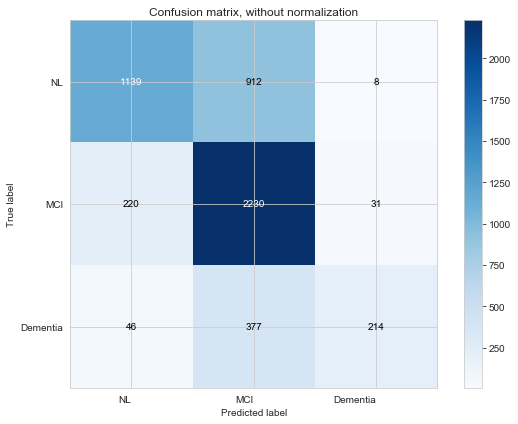

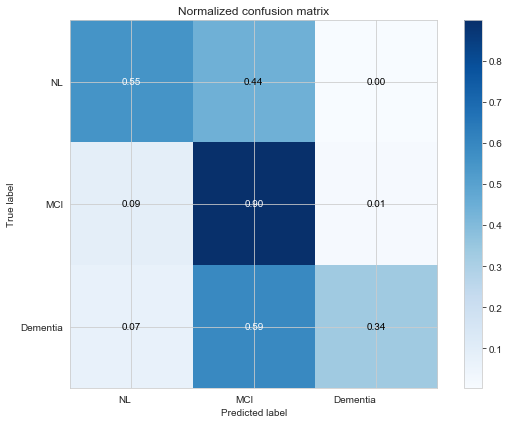

In [77]:
from sklearn.utils.multiclass import unique_labels
sns.set_style("whitegrid")
sns.despine()


def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(train['DX'])
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize = (8,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=['NL','MCI','Dementia'], yticklabels=['NL','MCI','Dementia'],
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(Y_test, y_pred,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(Y_test, y_pred, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


#### Classification Report

In [39]:
from sklearn.metrics import classification_report
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier(max_depth=1)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('Neural Network', MLPClassifier()))
# evaluate each model in turn
results = []
names = []
cm =[]
y_actu_arr = (Y_test)
for name , model in models:
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)    

   
    results.append(classification_report(y_actu_arr,y_pred, labels=[1, 2, 3]))
    names.append(name)
print()
print("Variable :{}".format(i))


for j, k in zip(names, results):
    print("{} Classification Report : {}".format(j,k))


Variable :126
LR Classification Report :               precision    recall  f1-score   support

           1       0.56      0.34      0.42      2059
           2       0.52      0.76      0.62      2481
           3       0.38      0.20      0.26       637

   micro avg       0.52      0.52      0.52      5177
   macro avg       0.49      0.43      0.43      5177
weighted avg       0.52      0.52      0.50      5177

LDA Classification Report :               precision    recall  f1-score   support

           1       0.56      0.33      0.41      2059
           2       0.52      0.76      0.61      2481
           3       0.40      0.22      0.28       637

   micro avg       0.52      0.52      0.52      5177
   macro avg       0.49      0.43      0.44      5177
weighted avg       0.52      0.52      0.49      5177

KNN Classification Report :               precision    recall  f1-score   support

           1       0.69      0.68      0.68      2059
           2       0.70      0.

#### Averaged Multiclass ROC AUC Score

In [40]:
#https://medium.com/@plog397/auc-roc-curve-scoring-function-for-multi-class-classification-9822871a6659
from sklearn import preprocessing
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [45]:
from sklearn.metrics import roc_auc_score
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier(max_depth=1)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('Neural Network', MLPClassifier()))
# evaluate each model in turn
results = []
names = []
cm =[]
y_actu_arr = (Y_test)
for name , model in models:
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)    

   
    results.append(multiclass_roc_auc_score(y_actu_arr,y_pred))
    names.append(name)
print()
print("Variable :{}".format(i))


for j, k in zip(names, results):
    print("{} Multiclass AUC Score : {}".format(j,k))


Variable :126
LR Multiclass AUC Score : 0.5737131782202288
LDA Multiclass AUC Score : 0.5724387986423561
KNN Multiclass AUC Score : 0.7151160168150245
CART Multiclass AUC Score : 0.990378550738756
RF Multiclass AUC Score : 0.5
NB Multiclass AUC Score : 0.5944418732568593
SVM Multiclass AUC Score : 0.7026574841129055
Neural Network Multiclass AUC Score : 0.5594069080595108


#### are you binarizing the output and then calculating the ROC for each class in one vs all ? 
Yes! That's what is done after the comment #marking the current class as 1 and all other classes as 0

https://stackoverflow.com/questions/39685740/calculate-sklearn-roc-auc-score-for-multi-class

#### Multiclass ROC Dictionary

In [43]:
from sklearn.metrics import roc_auc_score
def multiclass_roc_dict(model):
    selected_classifier = model
    selected_classifier.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    #creating a set of all the unique classes using the actual class list
    unique_class = set(test['DX'].values)
    roc_auc_dict = {}
    for per_class in unique_class:
        #creating a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]

        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in Y_test]
        new_pred_class = [0 if x in other_class else 1 for x in y_pred]

        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = 'macro')
        roc_auc_dict[per_class] = roc_auc
    return roc_auc_dict
    


In [55]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier(max_depth=1)))
models.append(('NB', GaussianNB()))

models.append(('Neural Network', MLPClassifier()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
cm =[]
y_actu_arr = (Y_test)
for name , model in models:
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)    

   
    results.append(multiclass_roc_dict(model))
    names.append(name)
print()
print("Variable :{}".format(i))


for j, k in zip(names, results):
    print("{} Multiclass AUC Score : {}".format(j,k))


Variable :2
LR Multiclass AUC Score : {1: 0.5835518185310131, 2: 0.5617182426201744, 3: 0.5758694735094987}
LDA Multiclass AUC Score : {1: 0.5796434620641057, 2: 0.5528248367115298, 3: 0.5848480971514326}
KNN Multiclass AUC Score : {1: 0.7389399656882704, 2: 0.7300676536334898, 3: 0.6763404311233134}
CART Multiclass AUC Score : {1: 0.9930174820349404, 2: 0.991123936576737, 3: 0.9873309981396827}
RF Multiclass AUC Score : {1: 0.5, 2: 0.5, 3: 0.5}
NB Multiclass AUC Score : {1: 0.6208069455862822, 2: 0.5266700514413998, 3: 0.6358486227428959}
Neural Network Multiclass AUC Score : {1: 0.5743325272018743, 2: 0.5522530579585863, 3: 0.6329132635772032}
SVM Multiclass AUC Score : {1: 0.7339350295219815, 2: 0.7103576947411605, 3: 0.6636797280755745}


#### SVM Multiclass

<Figure size 432x288 with 0 Axes>

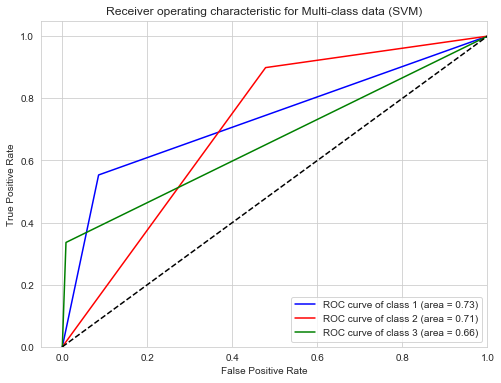

In [56]:

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

sns.set_style("whitegrid")
sns.despine()
fig,ax = plt.subplots(figsize = (8,6))

# Binarize the output
y_bin = label_binarize(Y_test, classes=[ 1, 2,3])
n_classes = y_bin.shape[1]

selected_classifier = SVC()
selected_classifier.fit(X_train, Y_train)
y_score = model.predict(X_test)
y_score = label_binarize(y_score, classes=[1, 2,3])


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i + 1, roc_auc[i] ))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Multi-class data (SVM)')
plt.legend(loc="lower right")
plt.show()


#### Extract the Demographic for the patients

In [78]:
demographics = df2.groupby(['RID']).agg(
{'D1' : lambda x: max(list(x)),
 'D2': lambda x: max(list(x)),
 'AGE_UPDATED' : lambda x: max(list(x)),
 'PTGENDER' : lambda x: max(list(x)),
 'PTEDUCAT': lambda x: max(list(x)),
 'PTETHCAT': lambda x: max(list(x)),
 'PTRACCAT': lambda x: max(list(x)),
 'PTMARRY': lambda x: max(list(x)),
 'APOE4' : lambda x: max(list(x))
    
})

# Using ravel, and a string join, we can create better names for the columns:
demographics.columns = ["".join(x) for x in demographics.columns.ravel()]
demographics = demographics.reset_index()
demographics['RID'].nunique()

1730

In [79]:
demographics.head()

,RID,D1,D2,AGE_UPDATED,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,PTMARRY,APOE4
0,2,1,1,84.34,Male,16,Not Hisp/Latino,White,Married,0.0
1,3,1,0,83.30,Male,18,Not Hisp/Latino,White,Married,1.0
2,4,1,0,70.53,Male,10,Hisp/Latino,White,Married,0.0
3,5,1,0,76.71,Male,16,Not Hisp/Latino,White,Married,0.0
4,6,1,0,83.43,Female,13,Not Hisp/Latino,White,Married,0.0


In [80]:
demographics['D1'][demographics['D1'] == 1].shape

(1667,)

In [81]:
demographics['D2'][demographics['D2'] == 1].shape

(895,)

### Pivot the table .....